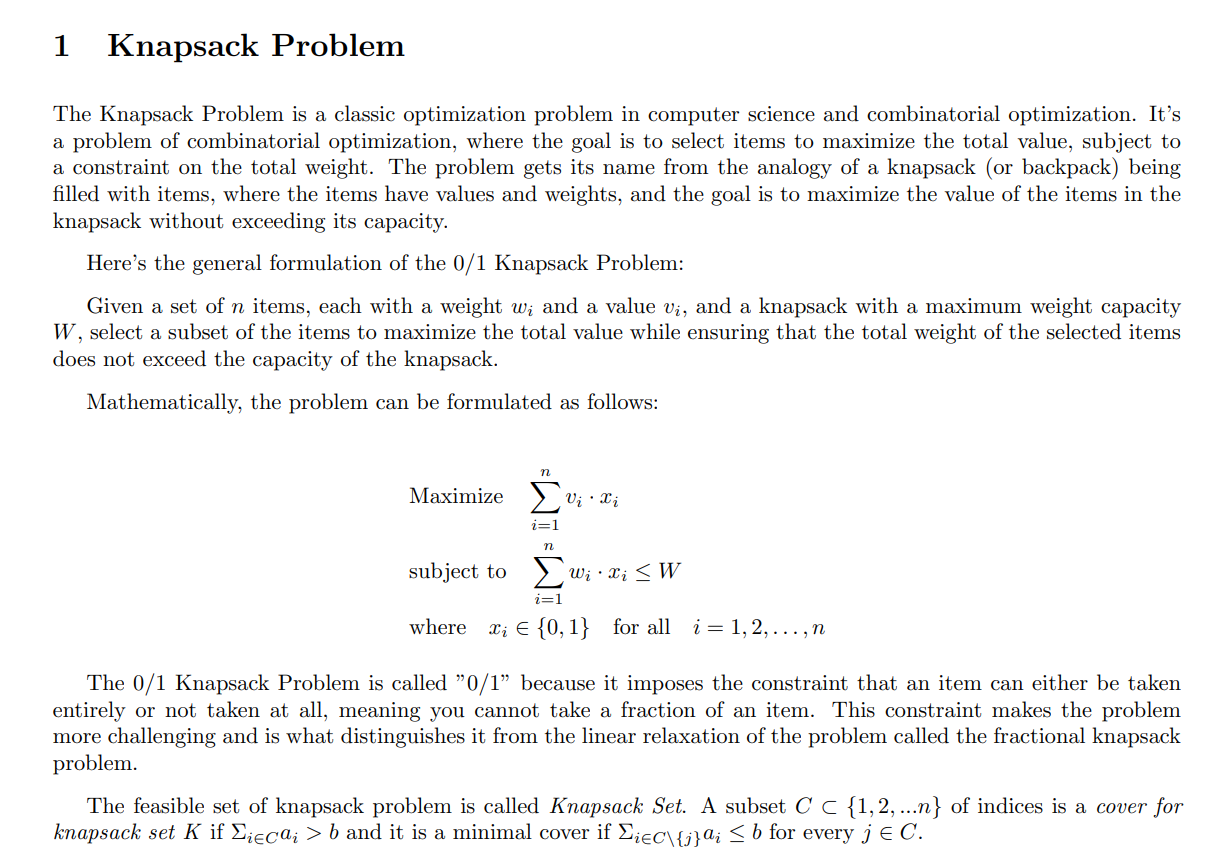

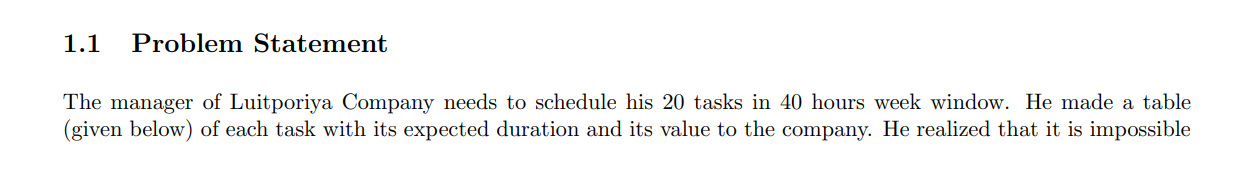

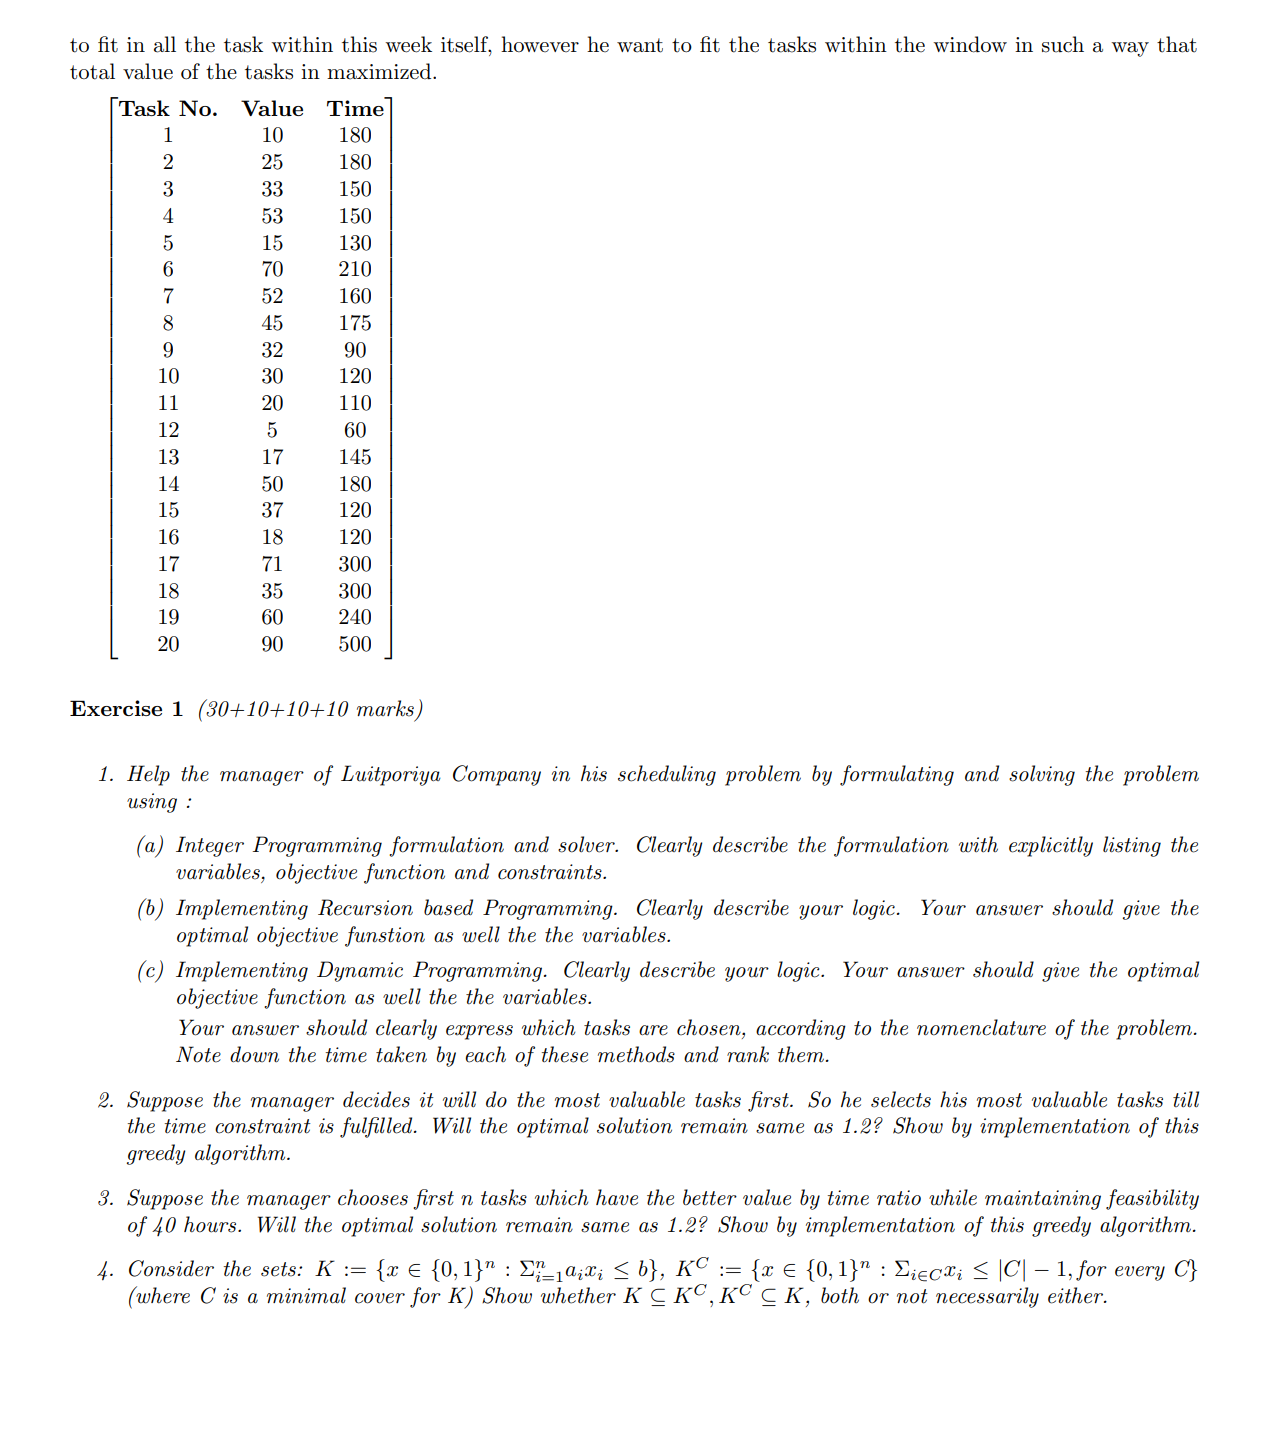

#Question 1(a)

Let's denote the decision variable $x_i$ as follows:

$
x_i =
\begin{cases}
1, & \text{if task } i \text{ is selected} \\
0, & \text{otherwise}
\end{cases}
$

The objective function is to maximize the total value of the selected tasks. Let's denote the value of task $i$ as $v_i$, and $w_i$ as the time taken by task $i$. Then, the objective function can be formulated as:

Maximize:
$
\sum_{i=1}^{n} v_i \cdot x_i
$

Subject to the following constraints:

The total time taken by selected tasks should not exceed the maximum available time:
$
\sum_{i=1}^{n} w_i \cdot x_i \leq T
$

where $T$ is the maximum available time.

Each task can either be selected or not:
$
x_i \in \{0,1\} \quad \text{for } i=1,2,...,n
$

In [1]:
#here we using the knapsack we find the selected task and the maximum value
def knapsack(tasks, max_time):
    n = len(tasks)
    dp = [[0] * (max_time + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, max_time + 1):
            if tasks[i - 1][1] <= j:
                dp[i][j] = max(dp[i - 1][j], tasks[i - 1][0] + dp[i - 1][j - tasks[i - 1][1]])
            else:
                dp[i][j] = dp[i - 1][j]

    selected_tasks =[]
    j = max_time
    for i in range(n, 0, -1):
        if dp[i][j] != dp[i - 1][j]:
            selected_tasks.append(i)
            j -= tasks[i - 1][1]

    selected_tasks.reverse()
    return dp[n][max_time], selected_tasks

# Input tasks as (value, time) tuples
tasks = [
    (10, 180), (25, 180), (33, 150), (53, 150), (15, 130),
    (70, 210), (52, 160), (45, 175), (32, 90), (30, 120),
    (20, 110), (5, 60), (17, 145), (50, 180), (37, 120),
    (18, 120), (71, 300), (35, 300), (60, 240), (90, 500)
]

max_time = 40 * 60  # 40 hours converted to minutes
max_value, selected_tasks = knapsack(tasks, max_time)

print("Maximum value:", max_value)
print("Selected tasks:", selected_tasks)

Maximum value: 623
Selected tasks: [3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 19, 20]


In [2]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [3]:
from pyomo.environ import*

In [4]:
import numpy as np
import time

In [5]:
# Task data
tasks = [
    (10, 180), (25, 180), (33, 150), (53, 150), (15, 130),
    (70, 210), (52, 160), (45, 175), (32, 90), (30, 120),
    (20, 110), (5, 60), (17, 145), (50, 180), (37, 120),
    (18, 120), (71, 300), (35, 300), (60, 240), (90, 500)
]

# Maximum available time (in minutes)
max_time = 40 * 60

# Create a Concrete Model
model = ConcreteModel()

# Define decision variables
model.x = Var(range(1, len(tasks) + 1), domain=Binary)

# Objective function
model.obj = Objective(expr=sum(tasks[i-1][0] * model.x[i] for i in range(1, len(tasks) + 1)), sense=maximize)

# Constraint: Total time should not exceed maximum available time
model.constraints = Constraint(expr=sum(tasks[i-1][1] * model.x[i] for i in range(1, len(tasks) + 1)) <= max_time)

# Solve the problem
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
start_time_dp = time.time()
result = solver.solve(model)
end_time_dp = time.time()

# Print the results
print("Solver Status:", result.solver.status)
print("Solver Termination Condition:", result.solver.termination_condition)
print("Maximum total value:", model.obj())

print("Selected tasks:")
for i in range(1, len(tasks) + 1):
    if model.x[i].value == 1:
        print("Task", i)
print("Time taken by Integer Programming:", end_time_dp - start_time_dp, "seconds")
print("Number of tasks selected:", sum(model.x[i].value for i in range(1, len(tasks) + 1)))


Solver Status: ok
Solver Termination Condition: optimal
Maximum total value: 623.0
Selected tasks:
Task 3
Task 4
Task 6
Task 7
Task 8
Task 9
Task 10
Task 14
Task 15
Task 17
Task 19
Task 20
Time taken by Integer Programming: 0.07648038864135742 seconds
Number of tasks selected: 12.0


#Question 1(b)

We can use a recursive function that explores all possible combinations of tasks within the given time constraint. We'll recursively consider each task and decide whether to include it in the schedule or not. At each step, we'll compare the total value obtained with the maximum value found so far, and update it if necessary.

Here's the logic for the recursive approach:

1. Define a recursive function that takes the current task index, remaining time, current value, and selected tasks as parameters.

2. If we have reached the end of the task list or run out of time, return the current value and selected tasks.
Otherwise, recursively call the function for two cases:

    2.1Include the current task in the schedule if its time fits within the remaining time.

    2.2 Exclude the current task from the schedule.


Compare the values obtained from the two cases and return the one with the maximum value.
Track the selected tasks at each step to retrieve the optimal solution.

In [6]:
def recursive_scheduler(tasks, max_time, index=0, remaining_time=max_time, current_value=0, selected_tasks=[]):
    # Base case: If all tasks have been considered or no remaining time, return current value and selected tasks
    if index >= len(tasks) or remaining_time <= 0:
        return current_value, selected_tasks

    # Include the current task if its time fits within the remaining time
    if tasks[index][1] <= remaining_time:
        # Recursive call to consider including the current task
        value_with_task, selected_with_task = recursive_scheduler(tasks, max_time, index + 1,
                                                                  remaining_time - tasks[index][1],
                                                                  current_value + tasks[index][0],
                                                                  selected_tasks + [index + 1])
    else:
        value_with_task, selected_with_task = float('-inf'), []

    # Recursive call to consider excluding the current task
    value_without_task, selected_without_task = recursive_scheduler(tasks, max_time, index + 1,
                                                                    remaining_time, current_value,
                                                                    selected_tasks)

    # Compare the values obtained with and without the current task
    if value_with_task > value_without_task:
        return value_with_task, selected_with_task
    else:
        return value_without_task, selected_without_task

# Task data
tasks = [
    (10, 180), (25, 180), (33, 150), (53, 150), (15, 130),
    (70, 210), (52, 160), (45, 175), (32, 90), (30, 120),
    (20, 110), (5, 60), (17, 145), (50, 180), (37, 120),
    (18, 120), (71, 300), (35, 300), (60, 240), (90, 500)
]

# Maximum available time (in minutes)
max_time = 40 * 60

# Call the recursive function
start_time_dp = time.time()
max_value, selected_tasks = recursive_scheduler(tasks, max_time)
end_time_dp = time.time()
# Print the results
print("Maximum total value:", max_value)
print("Selected tasks:", selected_tasks)
print("Time taken by Recursion Programming:", end_time_dp - start_time_dp, "seconds")

Maximum total value: 623
Selected tasks: [3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 19, 20]
Time taken by Recursion Programming: 1.481614589691162 seconds


#Question 1(c)

In [7]:
import time

def dynamic_programming_scheduler(tasks, max_time):
    n = len(tasks)
    memo = [[0] * (max_time + 1) for _ in range(n + 1)]

    # Fill the memoization table
    for i in range(1, n + 1):
        for t in range(max_time + 1):
            value, time = tasks[i - 1]
            if time <= t:
                memo[i][t] = max(memo[i - 1][t], memo[i - 1][t - time] + value)
            else:
                memo[i][t] = memo[i - 1][t]

    # Backtrack to determine selected tasks
    selected_tasks = []
    t = max_time
    for i in range(n, 0, -1):
        if memo[i][t] != memo[i - 1][t]:
            selected_tasks.append(i)
            t -= tasks[i - 1][1]

    selected_tasks.reverse()

    return memo[n][max_time], selected_tasks

# Task data
tasks = [
    (10, 180), (25, 180), (33, 150), (53, 150), (15, 130),
    (70, 210), (52, 160), (45, 175), (32, 90), (30, 120),
    (20, 110), (5, 60), (17, 145), (50, 180), (37, 120),
    (18, 120), (71, 300), (35, 300), (60, 240), (90, 500)
]

# Maximum available time (in minutes)
max_time = 40 * 60

# Solve using dynamic programming
start_time_dp = time.time()
max_value_dp, selected_tasks_dp = dynamic_programming_scheduler(tasks, max_time)
end_time_dp = time.time()

# Print the results
print("Maximum total value (Dynamic Programming):", max_value_dp)
print("Selected tasks (Dynamic Programming):", selected_tasks_dp)
print("Time taken by Dynamic Programming:", end_time_dp - start_time_dp, "seconds")


Maximum total value (Dynamic Programming): 623
Selected tasks (Dynamic Programming): [3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 19, 20]
Time taken by Dynamic Programming: 0.024660587310791016 seconds


**Observation:-** From the above we see that the integer programming > Dynamic programming > Dynamic programming

here above is the order defined as whose take the less time as compare to another

#Question 2

In [8]:
def greedy_scheduler(tasks, max_time):
    # Sort tasks by decreasing order of value
    sorted_tasks = sorted(tasks, key=lambda x: x[0], reverse=True)

    selected_tasks = []
    remaining_time = max_time
    total_value = 0

    # Greedily select tasks until time constraint is fulfilled
    for task in sorted_tasks:
        value, time = task
        if time <= remaining_time:
            selected_tasks.append(task)
            total_value += value
            remaining_time -= time

    return total_value, selected_tasks

# Task data
tasks = [
    (10, 180), (25, 180), (33, 150), (53, 150), (15, 130),
    (70, 210), (52, 160), (45, 175), (32, 90), (30, 120),
    (20, 110), (5, 60), (17, 145), (50, 180), (37, 120),
    (18, 120), (71, 300), (35, 300), (60, 240), (90, 500)
]

# Maximum available time (in minutes)
max_time = 40 * 60

# Solve using greedy algorithm
max_value_greedy, selected_tasks_greedy = greedy_scheduler(tasks, max_time)

# Print the results
print("Maximum total value (Greedy Algorithm):", max_value_greedy)
print("Selected tasks (Greedy Algorithm):", selected_tasks_greedy)


Maximum total value (Greedy Algorithm): 568
Selected tasks (Greedy Algorithm): [(90, 500), (71, 300), (70, 210), (60, 240), (53, 150), (52, 160), (50, 180), (45, 175), (37, 120), (35, 300), (5, 60)]


**Observation:-**  Here we see that the in the finded optimal solution is not same as the above a and b .

#Question 3

In [9]:
def greedy_ratio_scheduler(tasks, max_time):
    # Calculate value by time ratio for each task
    task_ratios = [(i, task[0] / task[1]) for i, task in enumerate(tasks)]

    # Sort tasks by value by time ratio in descending order
    sorted_tasks = sorted(task_ratios, key=lambda x: x[1], reverse=True)

    selected_tasks = []
    remaining_time = max_time
    total_value = 0

    # Greedily select tasks until time constraint is fulfilled
    for task_index, ratio in sorted_tasks:
        value, time = tasks[task_index]
        if time <= remaining_time:
            selected_tasks.append(tasks[task_index])
            total_value += value
            remaining_time -= time

    return total_value, selected_tasks

# Task data
tasks = [
    (10, 180), (25, 180), (33, 150), (53, 150), (15, 130),
    (70, 210), (52, 160), (45, 175), (32, 90), (30, 120),
    (20, 110), (5, 60), (17, 145), (50, 180), (37, 120),
    (18, 120), (71, 300), (35, 300), (60, 240), (90, 500)
]

# Maximum available time (in minutes)
max_time = 40 * 60

# Solve using greedy ratio algorithm
max_value_greedy_ratio, selected_tasks_greedy_ratio = greedy_ratio_scheduler(tasks, max_time)

# Print the results
print("Maximum total value (Greedy Ratio Algorithm):", max_value_greedy_ratio)
print("Selected tasks (Greedy Ratio Algorithm):", selected_tasks_greedy_ratio)


Maximum total value (Greedy Ratio Algorithm): 601
Selected tasks (Greedy Ratio Algorithm): [(32, 90), (53, 150), (70, 210), (52, 160), (37, 120), (50, 180), (45, 175), (30, 120), (60, 240), (71, 300), (33, 150), (20, 110), (18, 120), (25, 180), (5, 60)]


#Question 1.4

Let's break down the definitions:

Set $K$ represents a binary linear constraint where the sum of the products of binary variables $x_i$ and coefficients $a_i$ should be less than or equal to $b$.

Set $\mathcal{KC}$ represents a collection of binary linear constraints derived from minimal covers of set $K$. Each constraint in $\mathcal{KC}$ enforces that the sum of binary variables $x_i$ for every minimal cover $C$ should be less than $|\mathcal{C}|-1$.

Now, let's analyze whether $K$ is a subset of $\mathcal{KC}$ and vice versa:

$K \subseteq \mathcal{KC}$:
For $K$ to be a subset of $\mathcal{KC}$, it must hold that every constraint in $K$ is also represented by some constraint in $\mathcal{KC}$. This would imply that every minimal cover $C$ for $K$ enforces the same constraint as $K$. However, this is not necessarily true because minimal covers may enforce more specific constraints than the original $K$. Hence, $K$ is not necessarily a subset of $\mathcal{KC}$.

$\mathcal{KC} \subseteq K$:
For $\mathcal{KC}$ to be a subset of $K$, it must hold that every constraint in $\mathcal{KC}$ is also represented by the constraint set $K$. This would imply that the more specific constraints derived from minimal covers of $K$ cover all the constraints in $K$. However, this is not necessarily true because minimal covers may lead to constraints that are not present in the original $K$. Hence, $\mathcal{KC}$ is not necessarily a subset of $K$.

Therefore, we cannot conclude that $K$ is a subset of $\mathcal{KC}$, or $\mathcal{KC}$ is a subset of $K$. Both sets represent different types of constraints, and their relationship depends on the specific characteristics of the problem instance.